In [15]:
import dill
with open('data_usb_x.pkl', 'rb') as f:
  data = dill.load(f)

In [16]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

# Crop Data

In [ ]:
old_image_size = data['left_cam'][0].shape
new_image_size = [64, 64]
y_start = int((old_image_size[0] - new_image_size[0]) / 2)
x_start = int((old_image_size[1] - new_image_size[1]) / 2)
y_end = int((old_image_size[0] + new_image_size[0]) / 2)
x_end = int((old_image_size[1] + new_image_size[1]) / 2)

In [ ]:
from copy import deepcopy
data_new = deepcopy(data)

In [ ]:
for i, im in enumerate(data['left_cam']):
  data_new['left_cam'][i] = im[y_start:y_end, x_start:x_end]
for i, im in enumerate(data['right_cam']):
  data_new['right_cam'][i] = im[y_start:y_end, x_start:x_end]
print(data_new['left_cam'][0].shape)

In [ ]:
with open('data_new.pkl', 'wb') as f:
  dill.dump(data_new, f)

# Constraint Height

In [7]:
old_image = np.array(data['left_cam'][20])

In [140]:
import numpy as np
import matplotlib.pyplot as plt
max_depth = 0.002

In [ ]:
min_dist = np.min(old_image)
max_dist = min_dist + max_depth

In [ ]:
new_image = deepcopy(old_image)
new_image[new_image > max_dist] = 0

In [ ]:
plt.imshow(old_image/np.max(old_image))

In [ ]:
plt.imshow(new_image/max_dist)

In [ ]:
data_new = deepcopy(data)
for i, im in enumerate(data['left_cam']):
  min_dist = np.min(im)
  max_dist = min_dist + max_depth
  data_new['left_cam'][i][im > max_dist] = 0
for i, im in enumerate(data['right_cam']):
  min_dist = np.min(im)
  max_dist = min_dist + max_depth
  data_new['right_cam'][i][im > max_dist] = 0

In [ ]:
with open('data_25664_dep2e-3.pkl', 'wb') as f:
  dill.dump(data_new, f)

# Constraint With Round Gel

In [17]:
old_image = np.array(data['left_cam'][20])
min_dist = np.min(old_image)
max_depth = 0.002

In [18]:
dist2center_x = np.tile((np.arange(64) - 32)/32*0.005, (256, 1)).transpose()
dist2center_y = np.tile((np.arange(256) - 128)/128*0.02, (64, 1))
dist2surface = 0.02 - np.sqrt(0.02**2 - dist2center_x**2 - dist2center_y**2)
max_dist = min_dist + max_depth - dist2surface

/tmp/user/22013/ipykernel_1912247/910239095.py:3: RuntimeWarning: invalid value encountered in sqrt
  dist2surface = 0.02 - np.sqrt(0.02**2 - dist2center_x**2 - dist2center_y**2)


In [19]:
new_image = deepcopy(old_image)
new_image[new_image > max_dist] = 0

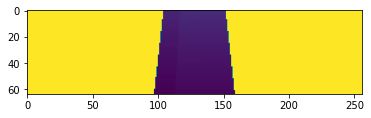

In [20]:
plt.imshow(old_image/np.max(old_image))

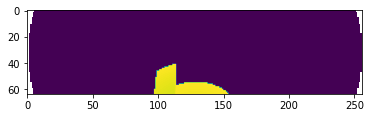

In [21]:
plt.imshow(new_image/max_dist)

In [22]:
data_new = deepcopy(data)
dist2center_x = np.tile((np.arange(64) - 32)/32*0.005, (256, 1)).transpose()
dist2center_y = np.tile((np.arange(256) - 128)/128*0.02, (64, 1))
dist2surface = 0.02 - np.sqrt(0.02**2 - dist2center_x**2 - dist2center_y**2)
max_dist_base =  max_depth - dist2surface
for i, im in enumerate(data['left_cam']):
  min_dist = np.min(im)
  max_dist = min_dist + max_dist_base
  data_new['left_cam'][i][im > max_dist] = 0
for i, im in enumerate(data['right_cam']):
  min_dist = np.min(im)
  max_dist = min_dist + max_dist_base
  data_new['right_cam'][i][im > max_dist] = 0

/tmp/user/22013/ipykernel_1912247/2537946086.py:4: RuntimeWarning: invalid value encountered in sqrt
  dist2surface = 0.02 - np.sqrt(0.02**2 - dist2center_x**2 - dist2center_y**2)


In [23]:
with open('data_usb_rdep2e-3.pkl', 'wb') as f:
  dill.dump(data_new, f)